In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_excel('/content/customer_data.xlsx')
df.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


,0
customer_id,0
gender,0
age,119
payment_method,0


In [ ]:
df.columns


Index(['customer_id', 'gender', 'age', 'payment_method'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical data
df['gender_encoded'] = LabelEncoder().fit_transform(df['gender'])
df['payment_encoded'] = LabelEncoder().fit_transform(df['payment_method'])

# Define input features
X = df[['age', 'gender_encoded', 'payment_encoded']]



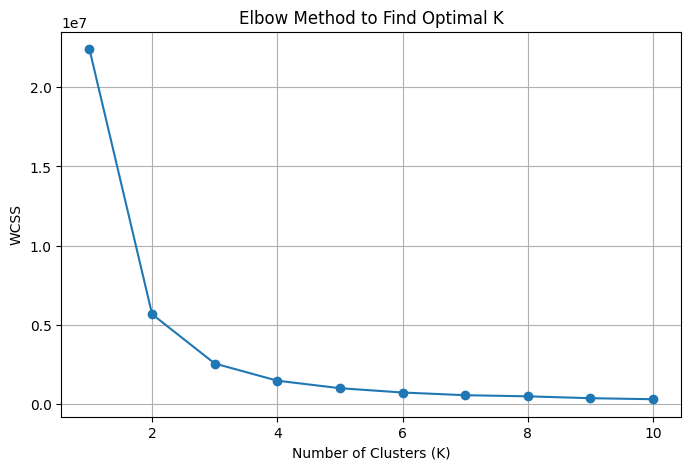

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = X.dropna()  # <-- This line removes rows with NaN values

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
# Train KMeans with chosen number of clusters (example: 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df.loc[X.index, 'Cluster'] = kmeans.fit_predict(X)



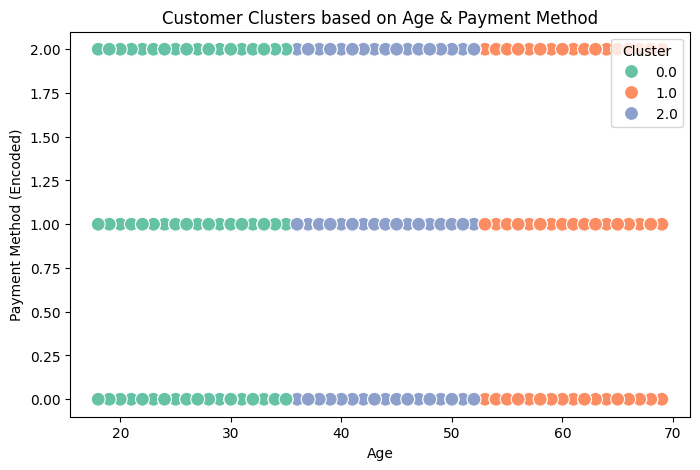

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['age'], y=df['payment_encoded'], hue=df['Cluster'], palette='Set2', s=100)
plt.title('Customer Clusters based on Age & Payment Method')
plt.xlabel('Age')
plt.ylabel('Payment Method (Encoded)')
plt.show()


In [ ]:
df[['customer_id', 'age', 'gender', 'payment_method', 'Cluster']].head(10)


,customer_id,age,gender,payment_method,Cluster
0,C241288,28.0,Female,Credit Card,0.0
1,C111565,21.0,Male,Debit Card,0.0
2,C266599,20.0,Male,Cash,0.0
3,C988172,66.0,Female,Credit Card,1.0
4,C189076,53.0,Female,Cash,1.0
5,C657758,28.0,Female,Credit Card,0.0
6,C151197,49.0,Female,Cash,2.0
7,C176086,32.0,Female,Credit Card,0.0
8,C159642,69.0,Male,Credit Card,1.0
9,C283361,60.0,Female,Credit Card,1.0


In [ ]:
# Encode gender and payment_method same as before
gender_val = LabelEncoder().fit(df['gender']).transform(['Male'])[0]
payment_val = LabelEncoder().fit(df['payment_method']).transform(['Credit Card'])[0]

# Create input array
new_customer = [[30, gender_val, payment_val]]

# Predict cluster
cluster = kmeans.predict(new_customer)
print("Predicted Cluster:", cluster[0])


Predicted Cluster: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# Encode gender and payment method
gender_val = LabelEncoder().fit(df['gender']).transform(['Female'])[0]
payment_val = LabelEncoder().fit(df['payment_method']).transform(['Debit Card'])[0]

# Input array
new_customer = [[45, gender_val, payment_val]]

# Predict cluster
cluster = kmeans.predict(new_customer)
print("Predicted Cluster:", cluster[0])


Predicted Cluster: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# Encode gender and payment method
gender_val = LabelEncoder().fit(df['gender']).transform(['Male'])[0]
payment_val = LabelEncoder().fit(df['payment_method']).transform(['Debit Card'])[0]

# Input array
new_customer = [[65, gender_val, payment_val]]

# Predict cluster
cluster = kmeans.predict(new_customer)
print("Predicted Cluster:", cluster[0])

Predicted Cluster: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
df['gender_encoded'] = gender_encoder.fit_transform(df['gender'])

payment_encoder = LabelEncoder()
df['payment_encoded'] = payment_encoder.fit_transform(df['payment_method'])



In [ ]:
cluster_labels = {
    0: "Young Digital Customers",
    1: "Mid-Age Credit Users",
    2: "Older Traditional Customers"
}
